# PyTorch WorkFlow Fundamentals
- The essence of ML and DL is to take data from past, build an algo like a NN, and discover patterns in it and use those patterns to predict the future
- Start with a straight line before going into bigger models
- See if torch can learn the patterns of the straight line and match it

In [2]:
what_were_covering = {1: "data (prepare and load)", 
    2: "build model",
    3: "fitting the model to data (training)",
    4: "making predictions and evaluating a model (inference)",
    5: "saving and loading a model",
    6: "putting it all together"
}

In [3]:
import torch
from torch import nn #nn contains all of torch's building blocks for nns which are the basic building blocks of neural networks
import matplotlib.pyplot as plt

#Checking the version of torch which
torch.__version__
#We will use torch.nn to create a model, this contains all of the building blocks for computational graphs (series of calc executed in a particular way)


'2.5.1'

# Data
- Can be anything from table of nums like spreadsheet or images, videos, audio files, text
<img src="001_pictures/01-machine-learning-a-game-of-two-parts.png" alt="Data Diagram" width="1000">
- ML is a game of 2 parts
    - Turn data into numbers (representation)
    - Pick or build model to learn representation
- We will 1st create our data as a straight line
- We'll use linear regression to create the data with known parameters (things that can be learned by a model and use torch to see if we can build model to estimate parameters using grad descent)


In [4]:
# Creating known parameters and 
weight = 0.7
bias = 0.3 

#Creating data
start = 0
end=1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1) #This unsqueeze adds an extra dimension along the 1st axis which is a column vector (think of it like 2nd dimension in reality)
y = weight*X + bias #This is obviously a linear relationship, so it should be easy for a model to learn

X[:10], y[:10] #this is the first 10 samples of the data

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

- We now have astarting dataset input X of 50 numbers between 0 and 1 all .02 apart. The output y is represented by $$y=wx+b -> y=0.7x+0.3$$
- We will now move towards building a model that can learn the relationship between X (features) and y (labels)
## Split Data into training and test sets
- Before we build the model, we need to split up the data
- In Real ML, we needs training set, test set, and a validation set
    - Training Set: Model learns from this data 60-80% of total data
    - Testing Set: Model is evaluated on this data to test what it has learned
        - Should always be kept separate from the rest of the data
    - Validation Set: Model gets tuned on this data, like practice exam before final exam


In [5]:
# Create train/test split
train_split = int(0.8 * len(X)) #80% of data used for training set, remainder 20 for testing
X_train, y_train = X[:train_split], y[:train_split] #This goes everything 9:) up until 80% of data
X_test, y_test = X[train_split:], y[train_split:] #This goes from 80% of data to the end

len(X_train), len(X_test), len(y_train), len(y_test)
#Since there is 50 samples in the dataset, it will be a 40/10 split


(40, 10, 40, 10)

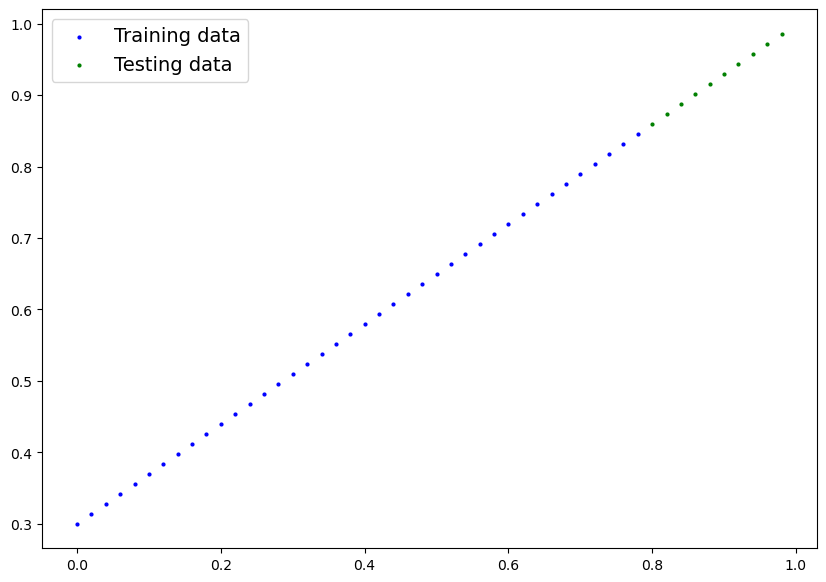

In [6]:
#We now want to learn the relationship between X train and y train, and evaluate what it learns using the testing sets

def plot_prediction(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=None):
    '''
    Plots the training data, test data, and compares the predictions.
    '''
    plt.figure(figsize=(10,7)) #The 10 and 7 represent the width and height of the figure

    #Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data") #parameter s is the size of the dots, while the first 2 parameters are the x and y coordinates
    
    #Plot test data in green
    plt.scatter(test_data, test_labels, c='g', s=4, label="Testing data")
    
    if predictions is not None:
        #Plot the predictions in red (these were made from the test data)
        plt.scatter(test_data, predictions, c='r', s=4, label="Predictions")
        
    #Show the legend
    plt.legend(prop={"size": 14});
    
plot_prediction()


# Build Model
- Now that we have data, we want to use the BLUE dots to predict the green dots
- We will first replicate a standard linear regression model in torch then explain it


In [ ]:
# Create a Linear Regression model class which 
class LinearRegressionModel(nn.Module): #almost verything in PyTorch is a nn.Module (like NN lego blocks), and in a class, the thing in () is the parent class
    
    def __init__(self): #This is the initializer, it is called when we instantiate the class and it is where we define the layers of the model and the computations they do
        
        super().__init__() #This line allows us to use the methods of the parent class (nn.Module)
        
        #nn.Parameter is a special type of tensor that is used to store the weights of the model
        self.weights = nn.Parameter(torch.randn(1, dtype=torch.float), #Start with random weights of size 1
                                    requires_grad=True) #This tells torch to track gradients of the weights
        
        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), #randn vs rand creates a tensor of random numbers from a normal distribution
                                requires_grad=True)
        
    #Forward defines the computation in the model and will be called when we pass data through the model
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights*x +self.bias #This is the equation of a line y = mx + b and 



## Model Building Essentials
- Torch has around 4 essential modules you can use to create almost any kind of NN 
- They are ```torch.nn, torch.optim, torch.utils.data.Dataset, and torch.utils.data.DataLoader```, we will only focus on the 1st 2 for now
    - ```torch.nn``` Contains all of the building blocks for computational graphs (series of calc executed in a particular way)
    - ```torch.nn.Parameter``` Stores tensors that can be used with ```nn.Module```.
        - If ```requires_grad=True```, gradients are calculated automatically, this is often called **autograd**
    - ```torch.nn.Module``` is the base class for all NN modules, all the building blocks for NNs are *subclasses*
        - If you're building a NN, your model's subclass ```nn.Module``` requires a ```forward()``` method to be implemented
    - ```torch.optim``` Contains various optimization algos 
        - These tell the model params stored in ```nn.Parameter``` how to best change to improve grad descent and in turn reduce the loss

### A Simplified version
- Almost everything in PyTorch NN comes from torch.nn
    - ```nn.Module``` contains the larger building blocks (layers)
    - ```nn.Parameter``` contains the smaller params like weights and biases (put these together to make ```nn.Module```s)
    - ```forward()``` tells the larger blocks how to make calculations on inputs (tensors full of data) within ```nn.Module```s
    - ```torch.optim``` contains optimization methods on how to improve the parameters within ```nn.Parameters``` to better represent input data

<img src="001_pictures/01-pytorch-linear-model-annotated.png" alt="Linear Model Diagram" width="1000">

## Checking the Contents of a PyTorch Model
- Now let us create a model instance with the class we've made and check its parameters using ```.parameters() ```


In [ ]:
# Set the manual seed since nn.Parameter are randomly initialized 

torch.manual_seed(42) 

#Create instance of model (subclass of nn.Module that contains nn.Parameter(s))
model_0 = LinearRegressionModel()

#Check the nn.Parameters within the nn.Module subclass we created
print(f"List of model parameters with list(model.parameters()): {list(model_0.parameters())}") 

#Another way to get the model contents is to get the state of if
print(f"\nThe randomized initial Model parameters with model.state_dict(): {model_0.state_dict()}") #THis is the state of the model


List of model parameters with list(model.parameters()): [Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]

Tha randomized initial Model parameters with model.state_dict(): OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])


## Inference: Making Predictions using ```torch.inference_mode()```
- To check this we can pass it the test data ```X_test``` to see how closely it predicts ```y_test```
- When we pass data to our model, it'll go through the model's ```forward()``` method and produce a result using the computations we've defined


In [9]:
#Making predictions with the model (inference), we use the context manager to disable gradient tracking
with torch.inference_mode():
    y_preds = model_0(X_test) 
    
"""
In older versions of torch, you mnight also see the following
with torch.no_grad():
    y_preds = model_0(X_test)
"""

#Checking the predictions, what basically happens is that the model takes the input data and passes it through the forward method, and then returns the output
print(f"Number of testing samples: {len(X_test)}")
print(f"Number of predictions made: {len(y_preds)}") 
print(f"Predicted values:\n{y_preds}") 


Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


- Notice how there's 1 pred val per testing sample
- This makes sense because for our straight line, each x maps to 1 y

tensor([[0.4618],
        [0.4691],
        [0.4764],
        [0.4836],
        [0.4909],
        [0.4982],
        [0.5054],
        [0.5127],
        [0.5200],
        [0.5272]])


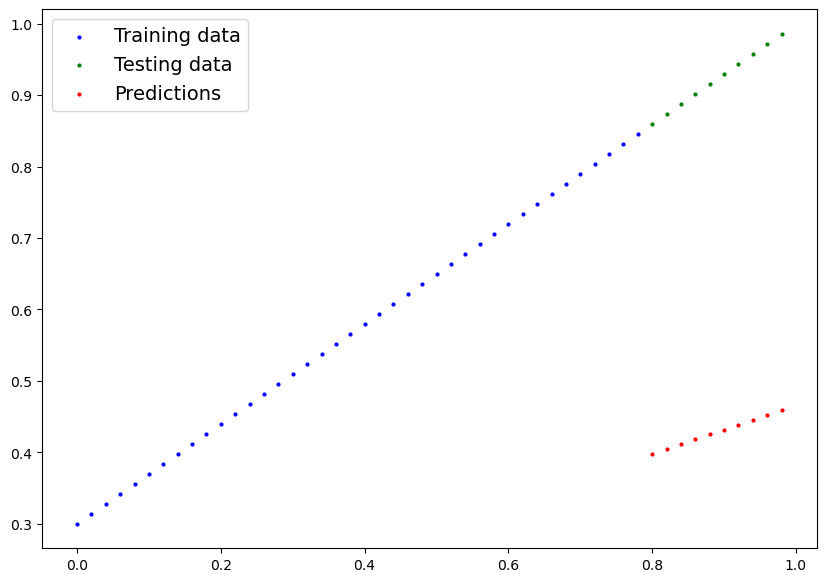

In [ ]:
#Now let us visualize them with our plot_prediction function we created above
plot_prediction(predictions=y_preds)

#Let's also subtract the preds from the test data to see how much error there is in the predictions
print(y_test - y_preds)

- While the orange predciton looks terrible, this makes sense because we have only initialized the random parameter values 
- We have yet to even look at the blue dots (the training data) to try and predict the green dots

# Training the Model
- We must update the internal paramaters (I also refer to params as patterns), the ws and bs we set randomly using ```nn.Parameter() and torch.randn()``` to be something that better represents the data
- We know the goal is $w=0.7; b=0.3$ but we won't always know what the ideal params are for the model, that's the whole point of this
## Creating Loss Function & Optimizer
- For our model to update its params on its own, we need to add more things: a **Loss Function** and an **Optimizer**
    - **Loss Function**: Measures how wrong the model's predictions ```y_preds``` are compared ot the truth labels ```y_test``` aka *ground truth*
        - This is built in as a function in ```torch.nn```
            - Common Regression problems use L1 (MAE) or L2 (MSE) Losses i.e. ```toch.nn.L1Loss()```
            - Common binary classification problems use cross entropy ```torch.nn.BCELoss()```
    - **Optimizer**: Tells your model how to update its internal parameters to best lower the loss
        - This is built into ```torch.optim```, with examples like Stochastic GD ```torch.optim.SGD()``` or Adam Optimizer ```torch.optim.Adam()```
- For our problem, since we're predicting a number with regression, we will use MAE ```torch.nn.L1Loss()``` as our loss function
    - ```torch.nn.L1Loss``` measures absolte different between 2 points (preds and labels) and then takes the **mean** across **all examples**

<img src="001_pictures/01-mae-loss-annotated.png" alt="L1 Loss Diagram" width="1000">

- We will use Stochastic Gradient Descent with ```torch.optim.SGD(params, lr)```:
    - ```params``` is the target model params we want to optimize ($w, b$) which we set randomly before
    - ```lr``` is the **learning rate** we want the optimizer to update params at, basically the size of the updates
        - Learning Rate is known as a **hyperparameter** because it is set by the ML engineer
        - Common values to start at are $lr=0.01, 0.001, 0.0001$, however, these can be adjusted over time (which can be achieved with **Learning Rate Scheduling**)

In [ ]:
# Create the loss function 
loss_fn = nn.L1Loss() # MAE = L1

#Create the optimizer
optimizer = torch.optim.SGD(params = model_0.parameters(), #parameters of target model to optimize
                            lr=0.01) #Higher lr is less stable but faster and lower is opposite 

## Creating an Optimization Loop
- Training Loop involves the model going through the training data and learning the relationships between the **features** and **labels**
- Testing Loop Testing Loop evaluated how good the patterns are that the model learned on the training data, with data it has **never** seen
- Called a "loop" because we want our model to look (loop through) each each sample in each dataset
- We do all of this by creating a Python ```for``` loop in the theme of the ***unofficial PyTorch optimization loop song***

<img src="001_pictures/01-pytorch-optimization-loop-song.png" alt="L1 Loss Diagram" width="600">

## PyTorch Training Loop
| Number | Step | Function | Code Example |
|--------|------|----------|--------------|
| 1 | Forward Pass | The model goes through all of the training data once, performing its ```forward()``` calculations | ```model(x_train)``` | 
| 2 | Calculate the Loss | Model's Outputs (predictions) are compared to the ground truth and evaluated to see how wrong they are | ```loss = loss_fn(y_pred, y_train)``` |
| 3 | Zero Gradients | The optimizer's grads are set to 0 (they are accumulated by default) so they can be recalc'd for the specific training step | ```optimizer.zero_grad()``` |
| 4 | Perform BackPropagation on the Loss | Computes the grad of the loss with respect to every model param to be updated (each parameter with ```requires_grad=True```) | ```loss.backward()``` |
| 5 | Updated the optimizer (gradient descent) | Updates the params with ```requires_grad=True``` w.r.t the loss gradients in order to improve them | ```optimizer.step``` |

<img src="001_pictures/01-pytorch-training-loop-annotated.png" alt="L1 Loss Diagram" width="1400">

- It is possible to see different orders than this in different training loops, but here are some rules of thumb
    - Calculate the loss *before* performing backpropagation on it ```loss.backward```
    - Zero the gradients ```optimizer.zero_grad()``` *before* computing the grads of the loss w.r.t every model param ```loss.backward()```
    - Step the optimizer ```optimizer.step()``` *after* performing backprop on the loss

## PyTorch Testing Loop
| Number | Step | Function | Code Example |
|--------|------|----------|--------------|
| Forward Pass| Model goes through all testing data once, performing forward function calcs | ```model(x_test)```|
|Calculate Loss| Model outputs compared to ground truth to see how wrong they are| ```loss = loss_fn(y_pred, y_test```|
|Calculate Evaluation metrics | Optionally calculate evaluation metrics like accuracy on the test set | Custom functions |

- Important o ntoe we do not do Backprop or optimizer stepping because no params in model should be being changed during testing, they've already been calculated
- For testing we are only interested in the output of the forward pass through the model

<img src="001_pictures/01-pytorch-testing-loop-annotated.png" alt="L1 Loss Diagram" width="1400">

We will now finally put everything together from this section and train the model for 100 epochs (forward passezs through the data) and we will evaluate it ever 10 epochs

In [ ]:
torch.manual_seed(42)

#Set the number of epochs
epochs=200

#Create empty lost lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training!
    
    #Put the model in training mode (the default state of the model), which will basically 
    model_0.train()
    
    # 1. Forward pass on training data using the forward() method inside
    y_pred = model_0(X_train)
    
    # 2. Calculate the loss (how different are our model's preds from the ground truth labels)
    loss = loss_fn(y_pred, y_train)
    
    # 3. Zero grad of the optimizer
    optimizer.zero_grad()
    
    # 4. Loss Backwards to calculate gradients through backprop
    loss.backward()
    
    # 5. Progress the optimizer
    optimizer.step()
    
    ### Testing
    
    model_0.eval()
    
    with torch.inference_mode():
        # 1. Forward pass on test data
        test_pred = model_0(X_test)
        
        # 2. Cal Loss on test data
        test_loss = loss_fn(test_pred, y_test.type(torch.float))
        
        # Printing out
        if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy()) # This is to detach the loss from the computation graph and convert it to a numpy array
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Training Loss: {loss} | MAE Test Loss: {test_loss}")

Epoch: 0 | MAE Training Loss: 0.31288138031959534 | MAE Test Loss: 0.48106518387794495
Epoch: 10 | MAE Training Loss: 0.1976713240146637 | MAE Test Loss: 0.3463551998138428
Epoch: 20 | MAE Training Loss: 0.08908725529909134 | MAE Test Loss: 0.21729660034179688
Epoch: 30 | MAE Training Loss: 0.053148526698350906 | MAE Test Loss: 0.14464017748832703
Epoch: 40 | MAE Training Loss: 0.04543796554207802 | MAE Test Loss: 0.11360953003168106
Epoch: 50 | MAE Training Loss: 0.04167863354086876 | MAE Test Loss: 0.09919948130846024
Epoch: 60 | MAE Training Loss: 0.03818932920694351 | MAE Test Loss: 0.08886633068323135
Epoch: 70 | MAE Training Loss: 0.03476089984178543 | MAE Test Loss: 0.0805937647819519
Epoch: 80 | MAE Training Loss: 0.03132382780313492 | MAE Test Loss: 0.07232122868299484
Epoch: 90 | MAE Training Loss: 0.02788739837706089 | MAE Test Loss: 0.06473556160926819
Epoch: 100 | MAE Training Loss: 0.024458957836031914 | MAE Test Loss: 0.05646304413676262
Epoch: 110 | MAE Training Loss: 0

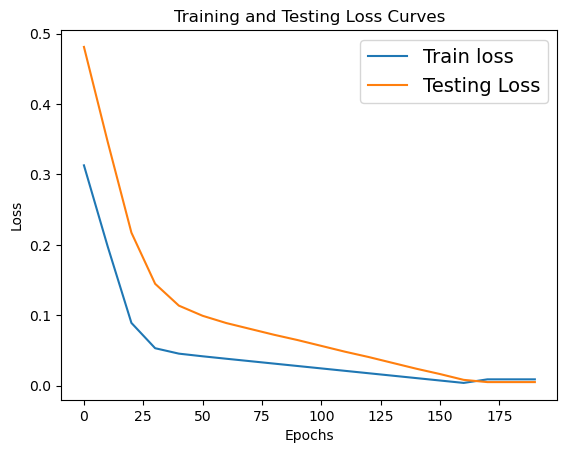

In [13]:
# Plotting the loss curves
plt.plot(epoch_count, train_loss_values, label = "Train loss")
plt.plot(epoch_count, test_loss_values, label="Testing Loss")
plt.title("Training and Testing Loss Curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(prop={"size": 14});

In [14]:
# Seeing what out model's learned parameters are
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"Weights: {weight}, Bias: {bias}") #this is the original values we set before

The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

And the original values for weights and bias are:
Weights: 0.7, Bias: 0.3


# Making Predictions with a Trained PyTorch Model (inference)
- Outside the training and testing loop, we want to set the model to evaluation mode ```model.eval()```
    - This way we don't have any unnecessary settings and calcs happening

- Make the predictions using the inference mode context managet ```with torch.inference_mode()```
- All predictions should be made with objects on the same device

In [16]:
# 1. Set the model in evaluation mode
model_0.eval()

# 2. Setup the inference mode context manager
with torch.inference_mode():
    # 3. Make sure calcs are done with the model and data on the same device
    # model_0.to(device)
    # X_test = X_test.to(device)
    y_preds = model_0(X_test)
y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

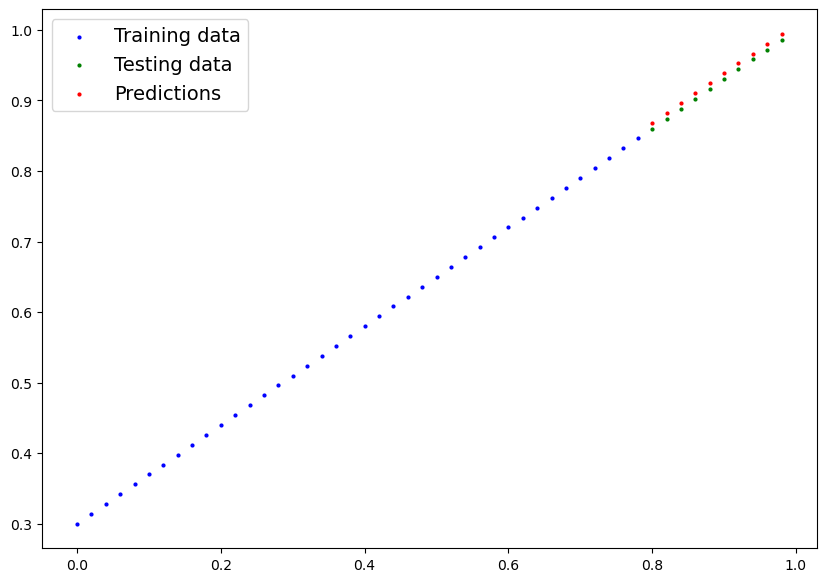

In [18]:
plot_prediction(predictions=y_preds)

# Saving & Loading a PyTorch Model
- There are 3 main methods to saving and loading models 
    1. ```torch.save```: Saves a serialized object using Python's pickle utility. Models, tensors and various other Python objects like diction aries can be saves with ```torch.save```
    2. ```torch.load``` Uses unpickling features to deserialize and load pickled Python object files like tensor or models into memory.
    3. ```torch.nn.Module.load_state_dict```: loads a model's parameter dictionary ```model.state_dict()``` using a saved ```state_dict()``` object

## Saving a model's ```state_dict()```
- The recommended way for saving a loading a model for inference is by saving and loading a model's ```state_dict()``` and has some steps
    1. Create a directory for saving models called ```models``` using Python's ```pathlib``` module
    2. Create a file path to save the model to
    3. Call ```torch.save(obj, f)``` where ```obj``` is the target model's ```state_dict()``` and ```f``` is the file name of where to save the model
- It is a common convention for PyTorch saved models or objects to end with ```.pt``` or ```.pth```

In [ ]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

#2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

#3. Save model state dict
print(f"Saving model to : {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), #only saving the state_dict() only saves the model learned params
        f=MODEL_SAVE_PATH)


Saving model to : models\01_pytorch_workflow_model_0.pth
